In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

import sys
sys.path.insert(0, '/Users/julianalverio/code/hrl/')
from aggregate_success_data import aggregate_success_data


root = '/Users/julianalverio/code/hrl/hindsight_experience_replay/vds_logs'

In [2]:
def plot_single(path):
    full_path = os.path.join(root, path)
    steps, values, stds, num_seeds = aggregate_success_data(full_path)
    upper_bounds = values + stds
    lower_bounds = values - stds
    plt.plot(steps, values, label=f'{path} ({int(num_seeds)})')
    plt.fill_between(steps, upper_bounds, lower_bounds, alpha=0.2)
    plt.legend()
    plt.xlim((0, 150000))

    
def plot(targets):
    assert isinstance(targets, list), 'Input must be a list!'
    for target in targets:
        plot_single(target)

In [3]:
def plot_csv(path, label=None):
    full_path = os.path.join(root, path, 'values.csv')
    if not os.path.exists(full_path):
        full_path = os.path.join('/Users/julianalverio/code/hrl/clean_baselines/logs', path, 'values.csv')
    df = pd.read_csv(full_path, header=0)
    values = np.array(df)
    values[:, 0] = 0.
    mean_values = values[1:].mean(axis=0)
    std = values[1:].std(axis=0)
    plt.xlim(right=150000)
#     plt.xlim(right=80000)
    if label is None:
        plt.plot(values[0], mean_values)
    else:
        plt.plot(values[0], mean_values, label=label)
    plt.fill_between(values[0], mean_values + std, mean_values - std, alpha=0.3)
    
def plot_csvs(paths, labels=None, title=None):
    assert isinstance(paths, list), 'Input must be a list!'
    if not labels:
        for path in paths:
            plot_csv(path)
    else:
        for path, label in zip(paths, labels):
            plot_csv(path, label)
        plt.legend()
    if title is not None:
        plt.title(title)


In [4]:
def get_environment_names():
    environments = list()
    for height in range(4, 17):
        environments.append(f'{height}x5E')
    for length in range(1, 6):
        environments.append(f'{length}U5')
    return environments


def get_single_success(environment, filename, vds=False, entropy=False, alg=False):
    if entropy:
        root = '/Users/julianalverio/code/hrl/clean_baselines/logs/entropy'
    elif vds:
        root = '/Users/julianalverio/code/hrl/clean_baselines/logs/vds'
    elif alg:
        root = '/Users/julianalverio/code/hrl/hindsight_experience_replay/vds_logs/paper'
        
        
    csv_path = os.path.join(root, filename, 'values.csv')
    df = pd.read_csv(csv_path, index_col=False)
    df = df.drop(columns=['Unnamed: 0'], axis=0)
    data = np.array(df)
    successes = list()
    for idx in range(1, data.shape[0]):
        # ignore first column: it's just timestep count
        success_idxs = np.where(data[idx, :] == 1.)[0]
        if success_idxs.shape[0] >= 1:
            first_success = success_idxs[0]
        else:
            first_success = np.NaN
        successes.append(first_success)
    successes = np.array(successes)
    return successes


In [5]:
MAZE_TO_LENGTH = dict(
    {'4x5E': 10,
    '5x5E': 12,
    '6x5E': 14,
    '7x5E': 16,
    '8x5E': 17,
    '9x5E': 19,
    '10x5E': 21,
    '11x5E': 23,
    '12x5E': 25,
    '13x5E': 27,
    '14x5E': 29,
    '15x5E': 31,
    '16x5E': 33,
    '17x5E': 35,
    '18x5E': 37,
    '1U5': 9,
    '2U5': 13,
    '3U5': 17,
    '4U5': 21,
    '5U5': 25,
    '6U5': 29,}
)

MAZE_TO_VDS = dict({
    '4x5E': 'final_vds_4x5E',
    '5x5E': 'final_vds_5x5E',
    '6x5E': 'final_vds_6x5E',
    '7x5E': 'final_vds_7x5E',
    '8x5E': 'final_vds_8x5E',
    '9x5E': 'final_vds_9x5E',
    '10x5E': 'final_vds_10x5E',
    '11x5E': 'final_vds_11x5E',
    '12x5E': 'final_vds_12x5E',
    '13x5E': 'final_vds_13x5E',
    '14x5E': 'final_vds_14x5E',
    '15x5E': 'final_vds_15x5E',
    '16x5E': 'final_vds_16x5E',
    '1U5': 'final_vds_1U5',
    '2U5': 'final_vds_2U5',
    '3U5': 'final_vds_3U5',
    '4U5': 'final_vds_4U5',
    '5U5': 'final_vds_5U5',
    '6U5': 'final_vds_6U5',
})

MAZE_TO_ENTROPY = dict({
    '4x5E': 'final_entropy_4x5E',
    '5x5E': 'final_entropy_5x5E',
    '6x5E': 'final_entropy_6x5E',
    '7x5E': 'final_entropy_7x5E',
    '8x5E': 'final_entropy_8x5E',
    '9x5E': 'final_entropy_9x5E',
    '10x5E': 'final_entropy_10x5E',
    '11x5E': 'final_entropy_11x5E',
    '12x5E': 'final_entropy_12x5E',
    '13x5E': 'final_entropy_13x5E',
    '14x5E': 'final_entropy_14x5E',
    '15x5E': 'final_entropy_15x5E',
    '16x5E': 'final_entropy_16x5E',
    '1U5': 'final_entropy_1U5',
    '2U5': 'final_entropy_2U5',
    '3U5': 'final_entropy_3U5',
    '4U5': 'final_entropy_4U5',
    '5U5': 'final_entropy_5U5',
    '6U5': 'final_entropy_6U5',
})

MAZE_TO_ALG = dict({
    '4x5E': 'final_exp1202',
    '5x5E': 'final_exp1203',
    '6x5E': 'final_exp1204',
    '7x5E': 'final_exp1205',
    '8x5E': 'final_exp1206',
    '9x5E': 'final_exp1207',
    '10x5E': 'final_exp1208',
    '11x5E': 'final_exp1209',
    '12x5E': 'final_exp1210',
    '13x5E': 'final_exp1211',
    '14x5E': 'final_exp1212',
    '15x5E': 'final_exp1213',
    '16x5E': 'final_exp1214',
    '1U5':  'final_exp1215',
    '2U5': 'final_exp1216',
    '3U5': 'final_exp1217',
    '4U5': 'final_exp1218',
    '5U5': 'final_exp1219',
})

MAZE_TO_ALG_PER = dict({
    '4x5E': 'final_exp1220',
    '5x5E': 'final_exp1221',
    '6x5E': 'final_exp1222',
    '7x5E': 'final_exp1223',
    '8x5E': 'final_exp1224',
    '9x5E': 'final_exp1225',
    '10x5E': 'final_exp1226',
    '11x5E': 'final_exp1227',
    '12x5E': 'final_exp1228',
    '13x5E': 'final_exp1229',
    '14x5E': 'final_exp1230',
    '15x5E': 'final_exp1231',
    '1U5':  'final_exp1232',
    '2U5': 'final_exp1233',
    '3U5': 'final_exp1234',
    '4U5': 'final_exp1235',
    '5U5': 'final_exp1236',
})

e_environments = ['4x5E', '5x5E', '6x5E', '7x5E', '8x5E', '9x5E', '10x5E', '11x5E', '12x5E', '13x5E', '14x5E', '15x5E', '16x5E']
u_environments = ['1U5', '2U5', '3U5', '4U5', '5U5']

In [9]:
def error_plot(environments, shortest_paths, state_space_sizes):
    entropy_points = list()
    entropy_stds = list()
    vds_points = list()
    vds_stds = list()
    alg_points = list()
    alg_stds = list()
    for idx, env in enumerate(environments):
        entropy_filename = MAZE_TO_ENTROPY[env]
        entropy_env_data = get_single_success(env, entropy_filename, entropy=True)
        vds_filename = MAZE_TO_VDS[env]
        vds_env_data = get_single_success(env, vds_filename, vds=True)
        alg_filename = MAZE_TO_ALG[env]
        alg_env_data = get_single_success(env, alg_filename, alg=True)
        per_alg_filename = MAZE_TO_ALG_PER[env]
        per_alg_env_data = get_single_success(env, per_alg_filename, per=True)
        if not np.any(np.isnan(entropy_env_data)):
            mean = entropy_env_data.mean()
            std = entropy_env_data.std()
            entropy_points.append(mean)
            entropy_stds.append(std)
        if not np.any(np.isnan(vds_env_data)):
            mean = vds_env_data.mean()
            std = vds_env_data.std()
            vds_points.append(mean)
            vds_stds.append(std)
        else:
            vds_points.append(np.NaN)
            vds_stds.append(np.NaN)
        if not np.any(np.isnan(alg_env_data)):
            mean = alg_env_data.mean()
            std = alg_env_data.std()
            alg_points.append(mean)
            alg_stds.append(std)
        else:
            alg_points.append(np.NaN)
            alg_stds.append(np.NaN)
        if not np.any(np.isnan(per_alg_env_data)):
            mean = per_alg_env_data.mean()
            std = per_alg_env_data.std()
            per_alg_points.append(mean)
            per_alg_stds.append(std)

    entropy_points = np.array(entropy_points)
    entropy_stds = np.array(entropy_stds)
    vds_points = np.array(vds_points)
    vds_stds = np.array(vds_stds)
    alg_points = np.array(alg_points)
    alg_stds = np.array(alg_stds)
    per_alg_points = np.array(per_alg_points)
    per_alg_stds = np.array(per_alg_stds)
    
    fig, ax = plt.subplots(constrained_layout=True)
    ax.errorbar(np.arange(len(environments)), entropy_points, entropy_stds, capsize=4., label='MEGA')
    ax.errorbar(np.arange(len(environments)), vds_points, vds_stds, capsize=4., label='VDS')
    ax.errorbar(np.arange(len(environments)), alg_points, alg_stds, capsize=4., label='QTA')
    ax.errorbar(np.arange(len(environments)), per_alg_points, per_alg_stds, capsize=4., label='QTA+PER')
    
    ax.set_xticks(ticks=np.arange(len(environments)))
    ax.set_xticklabels(shortest_paths)
    ax.set_xlabel('Shortest path length')
    ax.set_ylabel('Timesteps to solve maze (x1000)')
    
    ax2 = ax.twiny()
    ax2.set_xticks(ticks=np.arange(len(environments)))
    ax2.set_xticklabels(state_space_sizes)
    ax2.set_xlabel('Area of state space')
    
    ax.legend()

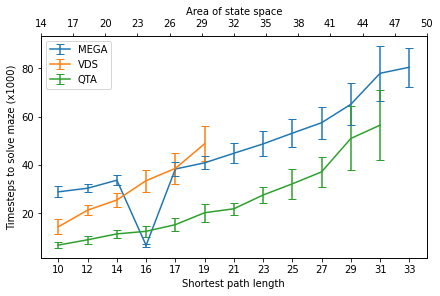

In [7]:
# height * width - 2 - (height-2)*2 → formula for white space in E mazes
def get_e_state_space_size(env):
    maze_height = int(re.match('(\d+)x(\d)+E', env).groups()[0])
    return maze_height * 5 - 2 - (maze_height-2) * 2

shortest_paths = [MAZE_TO_LENGTH[env] for env in e_environments]
state_space_sizes = [get_e_state_space_size(env) for env in e_environments]
error_plot(e_environments, shortest_paths, state_space_sizes)

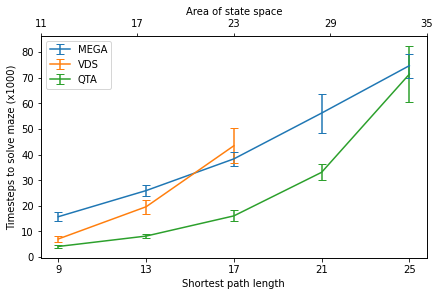

In [8]:
# (u_length+1) * num_u + u_length → formula for white space in W mazes
def get_u_state_space_size(env):
    return 6 * int(env[0]) + 5

shortest_paths = [MAZE_TO_LENGTH[env] for env in u_environments]
state_space_sizes = [get_u_state_space_size(env) for env in u_environments]
error_plot(u_environments, shortest_paths, state_space_sizes)

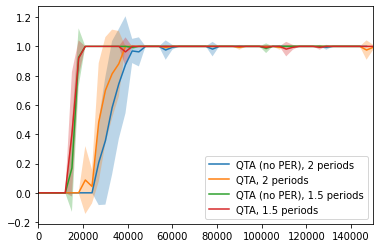

In [152]:
plot_csvs(['exp1175', 'exp1162', 'exp1174', 'exp1161'], ['QTA (no PER), 2 periods','QTA, 2 periods', 'QTA (no PER), 1.5 periods', 'QTA, 1.5 periods'])  # 4U5


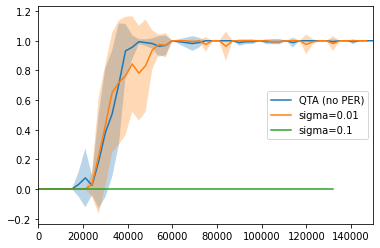

In [135]:
# ADD NOISE TO ESTIMATED EPISTEMIC UNCERTAINTY
plot_csvs(['exp1182', 'exp1187', 'exp1188'], ['QTA (no PER)', 'sigma=0.01', 'sigma=0.1'])

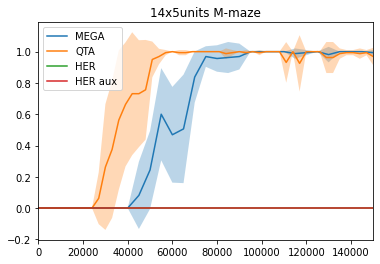

In [144]:
plot_csvs(['entropy_14x5E', 'exp1144', 'exp1199', 'exp1199'], ['MEGA', 'QTA', 'HER', 'HER aux'], '14x5units M-maze')

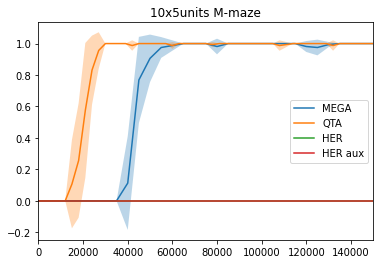

In [145]:
plot_csvs(['entropy_10x5E', 'exp1168', 'exp1199', 'exp1199'], ['MEGA', 'QTA', 'HER', 'HER aux'], '10x5units M-maze')

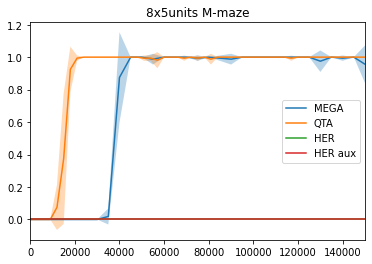

In [146]:
plot_csvs(['entropy_8x5E', 'exp1167', 'exp1199', 'exp1199'], ['MEGA', 'QTA', 'HER', 'HER aux'], '8x5units M-maze')

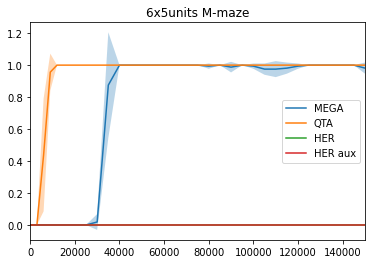

In [147]:
plot_csvs(['entropy_6x5E', 'exp1166', 'exp1195', 'exp1199'], ['MEGA', 'QTA', 'HER', 'HER aux'], '6x5units M-maze')

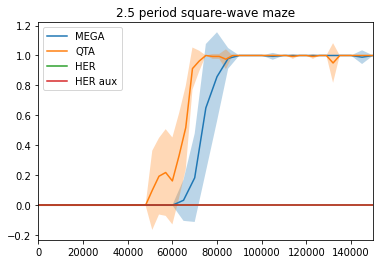

In [148]:
plot_csvs(['entropy_5U5', 'exp1137', 'exp1199', 'exp1199'], ['MEGA', 'QTA', 'HER', 'HER aux'], '2.5-period square-wave maze')

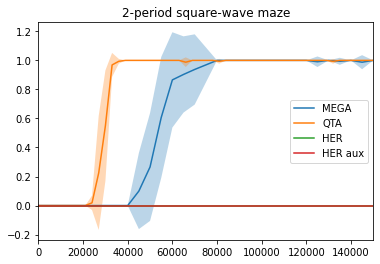

In [149]:
plot_csvs(['entropy_4U5', 'exp1149', 'exp1199', 'exp1199'], ['MEGA', 'QTA', 'HER', 'HER aux'], '2-period square-wave maze')

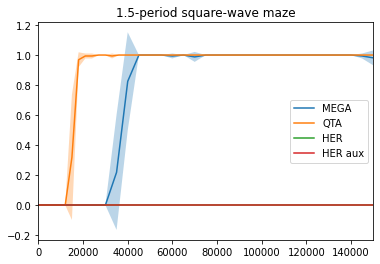

In [150]:
plot_csvs(['entropy_3U5', 'exp1135', 'exp1192', 'exp1199'], ['MEGA', 'QTA', 'HER', 'HER aux'], '1.5-period square-wave maze')

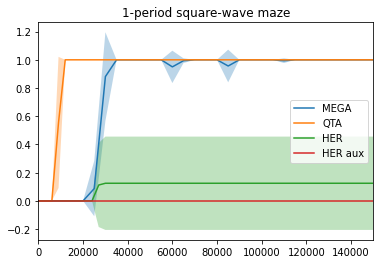

In [151]:
# 2U5
plot_csvs(['entropy_2U5', 'exp1134', 'exp1191', 'exp1198'], ['MEGA', 'QTA', 'HER', 'HER aux'], '1-period square-wave maze')

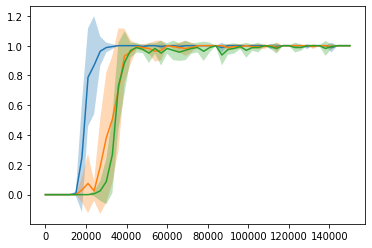

In [30]:
plot_csvs(['exp1181', 'exp1182', 'exp1183'])

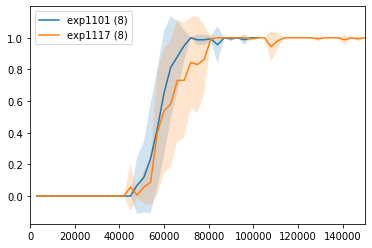

In [287]:
# 1042, 1101, 1102, 1103, 1106, 1107, 1110, 1111, 1117

plot(['exp1101', 'exp1117'])

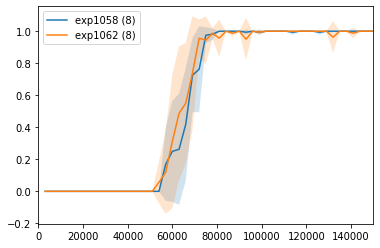

In [254]:
# 1042, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1068, 1069

plot(['exp1058', 'exp1062'])

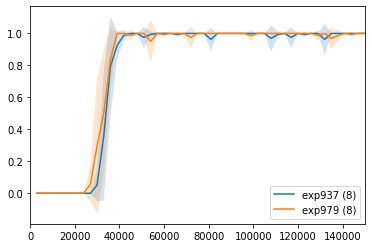

In [240]:
plot(['exp937', 'exp979'])

In [ ]:
plot(['exp975', 'exp974'])

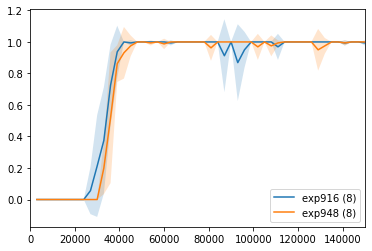

In [224]:
plot(['exp916', 'exp948'])

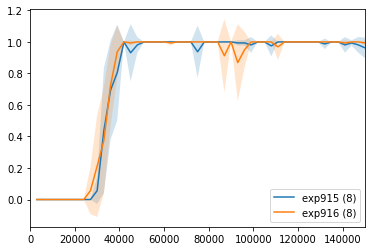

In [208]:
plot(['exp915', 'exp916'])

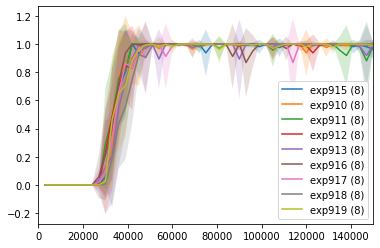

In [203]:
plot(['exp915', 'exp910', 'exp911', 'exp912', 'exp913', 'exp916', 'exp917', 'exp918', 'exp919'])

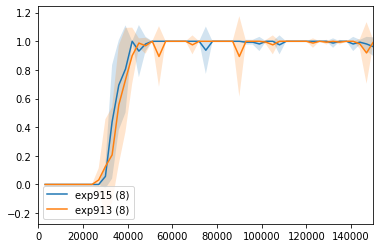

In [178]:
plot(['exp915', 'exp913'])

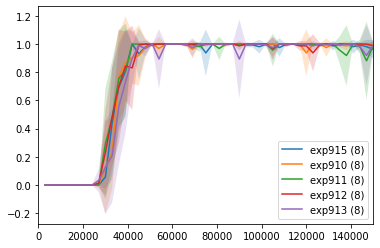

In [163]:
plot(['exp915', 'exp910', 'exp911', 'exp912', 'exp913'])

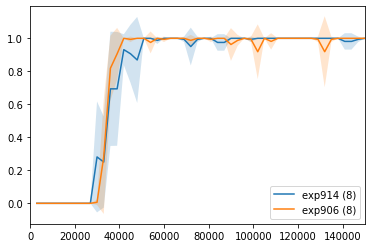

In [173]:
plot(['exp914', 'exp906'])

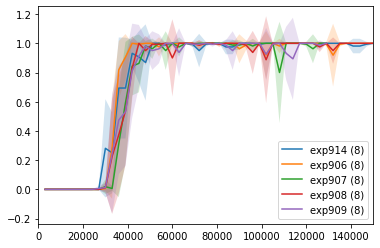

In [157]:
plot(['exp914', 'exp906', 'exp907', 'exp908', 'exp909'])

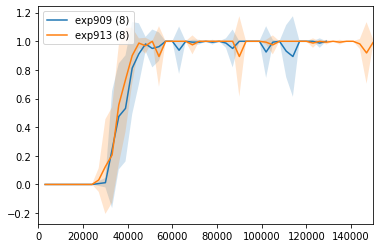

In [155]:
plot(['exp909', 'exp913'])

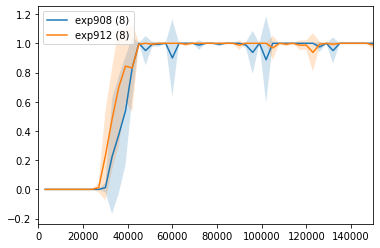

In [154]:
plot(['exp908', 'exp912'])

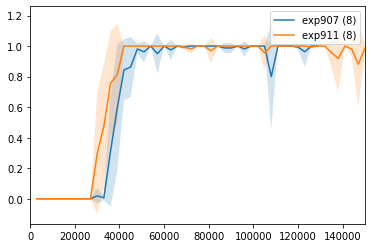

In [152]:
plot(['exp907', 'exp911'])

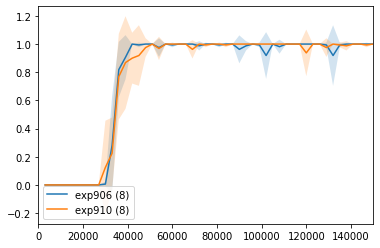

In [151]:
plot(['exp906', 'exp910'])

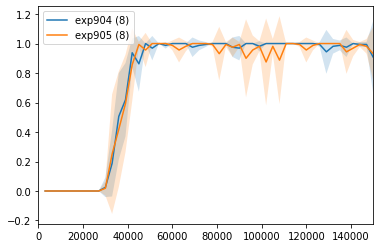

In [147]:
plot(['exp904', 'exp905'])

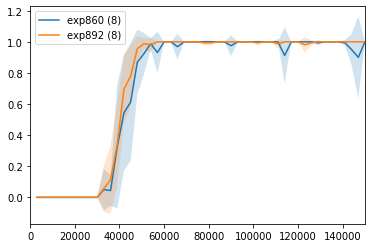

In [144]:
plot(['exp860', 'exp892'])

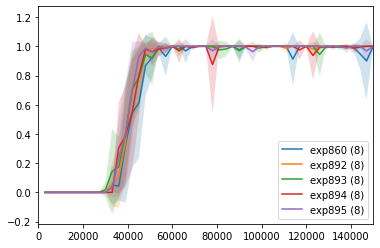

In [137]:
plot(['exp860', 'exp892', 'exp893', 'exp894', 'exp895'])

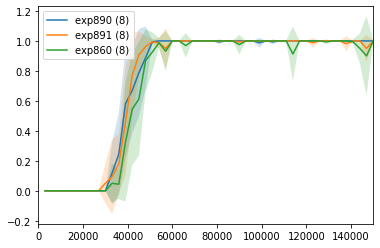

In [129]:
plot(['exp890', 'exp891', 'exp860'])

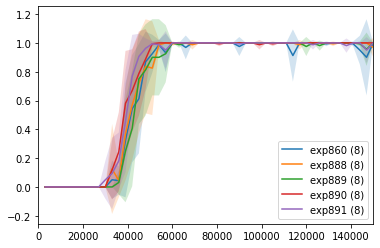

In [112]:
plot(['exp860', 'exp888', 'exp889', 'exp890', 'exp891'])

In [ ]:
'''
803: -70
804: -65
805: -60
806: -55
817: -50
818: -45
819: -40
820: -35
834: -40
835: -42.5
836: -45
837: -47.5
838: -50
'''

'''
803 - 806 all identical
Maybe 817 slightly worse than 803?
Rerun of 817 (838) re-confirmed it performs worse than 803. However, Q thresholds above and below outperform, so seems a fluke.
818 better than 803. Rerun (836) showed it might be slightly worse. Confirms that it's actually identical.
819 worse than 803. Rerun of 819 (834) reveals it's equal to 803
820 had worse learning dynamics but converged equal to 803
Maybe 836 slightly worse than 803?
837 appeared effectively identical to 803 (worse learning dynamics, same convergence)

'''

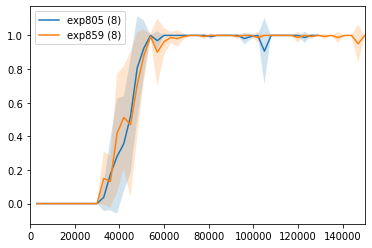

In [100]:
plot(['exp805', 'exp859'])

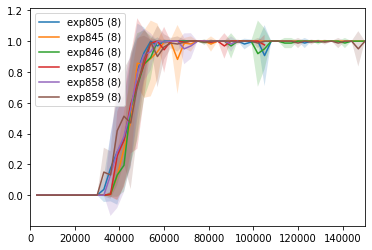

In [80]:
plot(['exp805', 'exp845', 'exp846', 'exp857', 'exp858', 'exp859'])

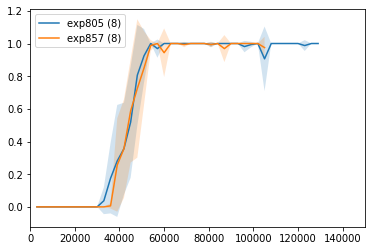

In [107]:
# 852 significantly overperformed 805 in the best case, had some bad outliers that made mean performance equivalent
# 853 appears to have actually outperformed, but immediately had a bad divergence
# 
plot(['exp805', 'exp857'])

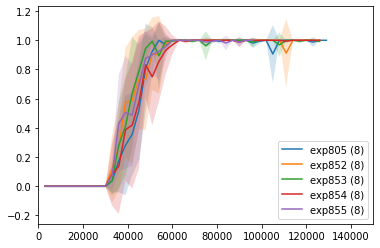

In [79]:
plot(['exp805', 'exp852', 'exp853', 'exp854', 'exp855'])

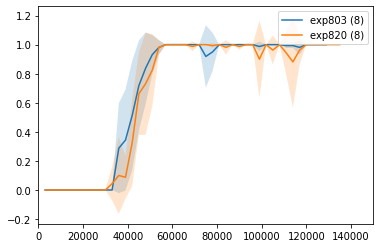

In [75]:
plot(['exp803', 'exp820'])

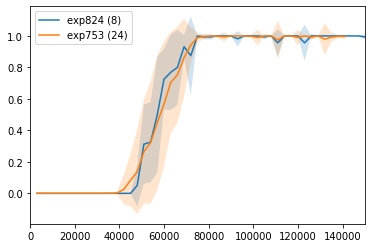

In [52]:
plot(['exp824', 'exp753'])

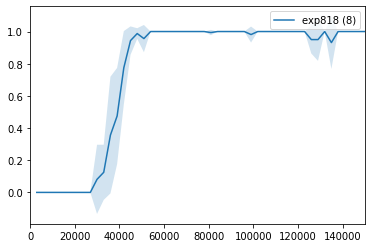

In [55]:
plot(['exp818'])

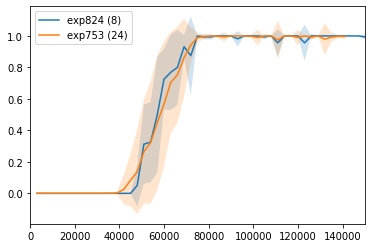

In [50]:
plot(['exp824', 'exp753'])

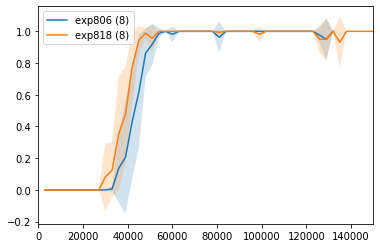

In [46]:
plot(['exp806', 'exp818']) #'exp817', 'exp818', 'exp819', 'exp820'])

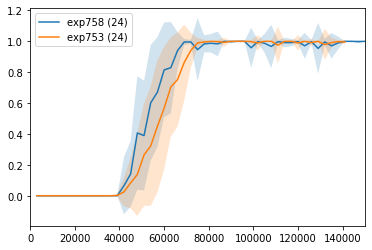

In [30]:
plot(['exp758', 'exp753'])

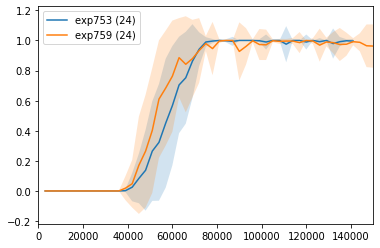

In [26]:
plot(['exp753', 'exp759'])

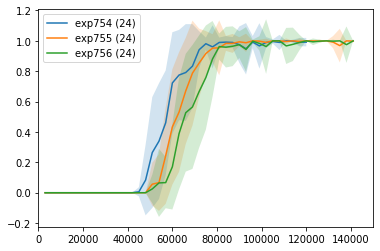

In [16]:
plot(['exp754', 'exp755', 'exp756'])

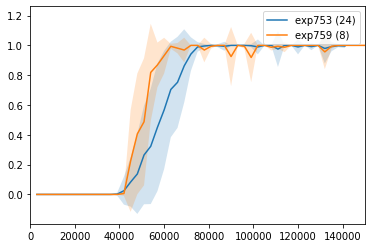

In [23]:
plot(['exp753', 'exp759'])

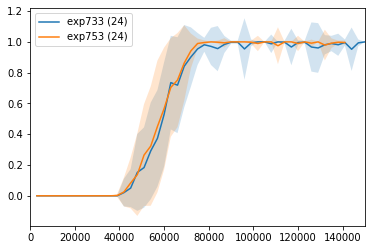

In [8]:
plot(['exp733', 'exp753'])

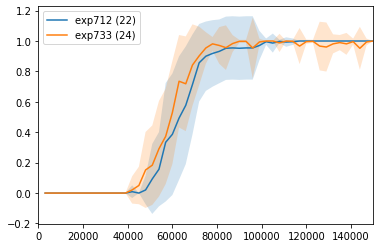

In [4]:
plot(['exp712', 'exp733'])

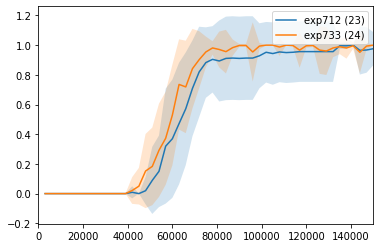

In [3]:
plot(['exp712', 'exp733'])

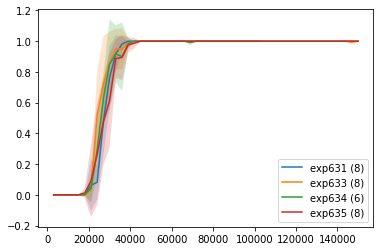

In [16]:
plot(['exp631', 'exp633', 'exp634', 'exp635'])

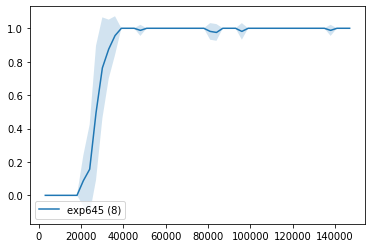

In [3]:
plot_single('exp645')

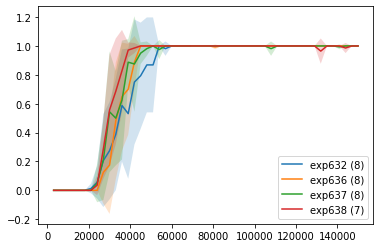

In [9]:
plot(['exp632', 'exp636', 'exp637', 'exp638'])

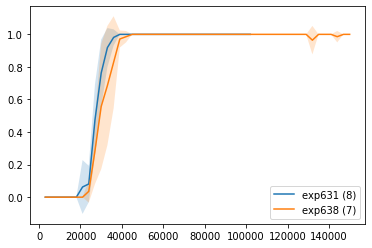

In [13]:
plot(['exp631', 'exp638']) 

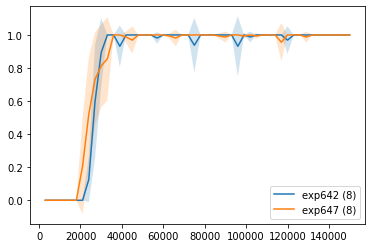

In [6]:
plot(['exp642', 'exp647'])

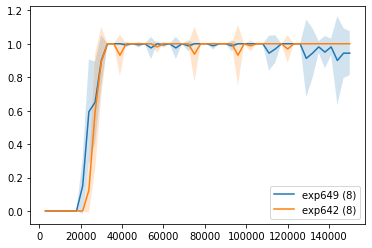

In [12]:
# 0.0001, 0.0003, 0.0005, 0.00075, 0.001
# plot(['exp636', 'exp648', 'exp642', 'exp649', 'exp640'])  # remove 636 (0.0001) for slow learning
# plot(['exp648', 'exp642', 'exp649', 'exp640']) # remove 640 (0.001) for being same + divergence
# plot(['exp648', 'exp642', 'exp649'])
# plot(['exp648', 'exp642'])
plot(['exp649', 'exp642'])

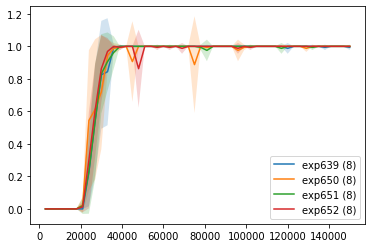

In [19]:
# v4, v2, v3
plot(['exp639', 'exp650', 'exp651', 'exp652'])

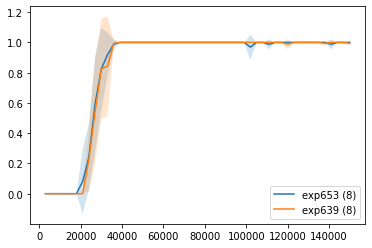

In [21]:
plot(['exp653', 'exp639'])